<table align="left" width=100%>
    <tr>
        <td width="10%">
            <img src="../images/RA_Logo.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> BBC Text Analysis </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/vidyadharbendre/learn_nlp_using_examples/blob/main/notebooks/bbc_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/vidyadharbendre/learn_nlp_using_examples/blob/main/notebooks/bbc_text_analysis.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

We cannot work with the text data in machine learning so we need to convert them into numerical vectors, As a part of this practice exercise you will implement different techniques to do the same.

In this notebook we are going to understand some basic text cleaning steps and techniques for encoding text data. We are going to learn about
1. **Understanding the data** - See what's data is all about. what should be considered for cleaning for data (Punctuations , stopwords etc..).
2. **Basic Cleaning** -We will see what parameters need to be considered for cleaning of data (like Punctuations , stopwords etc..)  and its code.
3. **Techniques for Encoding** - All the popular techniques that are used for encoding that I personally came across.
    *           **Bag of Words**
    *           **Binary Bag of Words**
    *           **Bigram, Ngram**
    *           **TF-IDF**( **T**erm  **F**requency - **I**nverse **D**ocument **F**requency)
    *           **Word2Vec**
    *           **Emotion and Sentiment analysis**

# Import Libraries

In [15]:
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit
import re
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline
from six import string_types
from string import punctuation

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
import os
import pandas as pd

# 1.Understanding the data

We will employ a text categorization dataset based on Reviews. Each article is assigned a specific captegory. 

Implement the code to load the dataset.(Hint: Use the pandas library to load the csv file.)

In [16]:
import os

# Define the path to the data folder
data_folder_path = os.path.join(os.pardir, 'data')

# Define the path to the text file
csv_file_path = os.path.join(data_folder_path, 'bbc-text.csv')

df = pd.read_csv(csv_file_path)


In [17]:
# Sanity check: Your output should look like the below
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


#### Create a function called "complaint_to_words" to store each consumer complaint narrative .

In [18]:
# Solution
complaint_to_words = df['text']  

# 2.Basic Cleaning

## 2.1.Tokenize

We will use the above function here to create a list of list that will store each complaint tokenized into separate words.(Hint: Use regular expression based tokenizer.)

In [19]:
data_list = list()
for comp in complaint_to_words:
    data_list.append(RegexpTokenizer('\w+').tokenize(comp))

In [20]:
print(data_list[:3]) # Example

[['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'ha

In [21]:
for file_id in data_list[:3]:
  print(file_id)

['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'has

## 2.2.Lower Case

In [22]:
low=[]
for line in data_list:
  lines = list(map(lambda x : x.lower(),line))
  low.append(lines) 
print(low[:3])

[['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'ha

## 2.3.Removing Stopwords

Converting all words to lowercase and removing punctuations and html tags if any

**Stemming**- Converting the words into their base word or stem word ( Ex - tastefully, tasty,  these words are converted to stem word called 'tasti'). This reduces the vector dimension because we dont consider all similar words  

**Stopwords** - Stopwords are the unnecessary words that even if they are removed the sentiment of the sentence dosent change.

Ex -    This pasta is so tasty ==> pasta tasty    ( This , is, so are stopwords so they are removed)

To see all the stopwords see the below code cell.

### 2.3.1.Removing Punctuation

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vidyadharbendre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# Remove Punctuation
  
#stop_words = set(stopwords.words('english')) 
puncList = [";",":","!","?","/","\\",",","#","@","$","&",")","(","\""]

#word_tokens = word_tokenize(text_tokens) 

Punc_filtered_sentence = [] 

for lines in low:
  punc = []
  for w in lines: 
      if w not in puncList: 
          punc.append(w) 
  Punc_filtered_sentence.append(punc)

print(len(low[0])) 
print(len(Punc_filtered_sentence[0])) 

750
750


In [25]:
print(low[0])

['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'has

In [26]:
print(Punc_filtered_sentence[0])

['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'has

### 2.3.2.Removing the Stop Words

In [27]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vidyadharbendre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
    
stop_words = set(stopwords.words('english')) 
    
filtered_sentence = [] 

for lines in Punc_filtered_sentence:
  word = []
  for w in lines: 
      if w not in stop_words: 
          word.append(w) 
  filtered_sentence.append(word)

print(len(Punc_filtered_sentence[0])) 
print(len(filtered_sentence[0])) 

750
421


In [30]:
print(Punc_filtered_sentence[0])

['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'has

In [31]:
print(filtered_sentence[0])

['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'tv', 'radically', 'different', 'five', 'years', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'viewers', 'via', 'home', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', 'one', 'talked', 'technologies', 'ces', 'digital', 'personal', 'video', 'recorders', 'dvr', 'pvr', 'set', 'top', 'boxes', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'people', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'tv', 'programmes', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'tv', 'als

## 2.4.Stemming & Lemitization

### 2.4.1.Stemming

In [32]:
from nltk.stem import PorterStemmer

In [33]:
#create an object of class PorterStemmer
porter = PorterStemmer()

In [34]:
# Stemming

stemmed=[]
for line in filtered_sentence:
  lines = list(map(lambda x : porter.stem(x),line))
  stemmed.append(lines) 
print(len(filtered_sentence[0])) 
print(len(stemmed[0])) 

421
421


In [35]:
print(filtered_sentence[0]) 

['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'tv', 'radically', 'different', 'five', 'years', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'viewers', 'via', 'home', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', 'one', 'talked', 'technologies', 'ces', 'digital', 'personal', 'video', 'recorders', 'dvr', 'pvr', 'set', 'top', 'boxes', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'people', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'tv', 'programmes', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'tv', 'als

In [36]:
print(stemmed[0])

['tv', 'futur', 'hand', 'viewer', 'home', 'theatr', 'system', 'plasma', 'high', 'definit', 'tv', 'digit', 'video', 'record', 'move', 'live', 'room', 'way', 'peopl', 'watch', 'tv', 'radic', 'differ', 'five', 'year', 'time', 'accord', 'expert', 'panel', 'gather', 'annual', 'consum', 'electron', 'show', 'la', 'vega', 'discuss', 'new', 'technolog', 'impact', 'one', 'favourit', 'pastim', 'us', 'lead', 'trend', 'programm', 'content', 'deliv', 'viewer', 'via', 'home', 'network', 'cabl', 'satellit', 'telecom', 'compani', 'broadband', 'servic', 'provid', 'front', 'room', 'portabl', 'devic', 'one', 'talk', 'technolog', 'ce', 'digit', 'person', 'video', 'record', 'dvr', 'pvr', 'set', 'top', 'box', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'peopl', 'record', 'store', 'play', 'paus', 'forward', 'wind', 'tv', 'programm', 'want', 'essenti', 'technolog', 'allow', 'much', 'personalis', 'tv', 'also', 'built', 'high', 'definit', 'tv', 'set', 'big', 'busi', 'japan', 'us', 'slower', 'take', 'eu

### 2.4.2.Lemitization

In [37]:
from nltk.stem import LancasterStemmer
lancaster=LancasterStemmer()

In [38]:
# Lemitization

lemmitized=[]
for line in stemmed:
  lines = list(map(lambda x : lancaster.stem(x),line))
  lemmitized.append(lines) 
print(len(stemmed[0])) 
print(len(lemmitized[0])) 

421
421


In [39]:
print(stemmed[0]) 

['tv', 'futur', 'hand', 'viewer', 'home', 'theatr', 'system', 'plasma', 'high', 'definit', 'tv', 'digit', 'video', 'record', 'move', 'live', 'room', 'way', 'peopl', 'watch', 'tv', 'radic', 'differ', 'five', 'year', 'time', 'accord', 'expert', 'panel', 'gather', 'annual', 'consum', 'electron', 'show', 'la', 'vega', 'discuss', 'new', 'technolog', 'impact', 'one', 'favourit', 'pastim', 'us', 'lead', 'trend', 'programm', 'content', 'deliv', 'viewer', 'via', 'home', 'network', 'cabl', 'satellit', 'telecom', 'compani', 'broadband', 'servic', 'provid', 'front', 'room', 'portabl', 'devic', 'one', 'talk', 'technolog', 'ce', 'digit', 'person', 'video', 'record', 'dvr', 'pvr', 'set', 'top', 'box', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'peopl', 'record', 'store', 'play', 'paus', 'forward', 'wind', 'tv', 'programm', 'want', 'essenti', 'technolog', 'allow', 'much', 'personalis', 'tv', 'also', 'built', 'high', 'definit', 'tv', 'set', 'big', 'busi', 'japan', 'us', 'slower', 'take', 'eu

In [40]:
print(lemmitized[0])

['tv', 'fut', 'hand', 'view', 'hom', 'the', 'system', 'plasm', 'high', 'definit', 'tv', 'digit', 'video', 'record', 'mov', 'liv', 'room', 'way', 'peopl', 'watch', 'tv', 'rad', 'diff', 'fiv', 'year', 'tim', 'accord', 'expert', 'panel', 'gath', 'an', 'cons', 'electron', 'show', 'la', 'veg', 'discuss', 'new', 'technolog', 'impact', 'on', 'favourit', 'pastim', 'us', 'lead', 'trend', 'program', 'cont', 'del', 'view', 'via', 'hom', 'network', 'cabl', 'satellit', 'telecom', 'compan', 'broadband', 'serv', 'provid', 'front', 'room', 'port', 'dev', 'on', 'talk', 'technolog', 'ce', 'digit', 'person', 'video', 'record', 'dvr', 'pvr', 'set', 'top', 'box', 'lik', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'peopl', 'record', 'stor', 'play', 'pau', 'forward', 'wind', 'tv', 'program', 'want', 'essent', 'technolog', 'allow', 'much', 'person', 'tv', 'also', 'built', 'high', 'definit', 'tv', 'set', 'big', 'bus', 'jap', 'us', 'slow', 'tak', 'europ', 'lack', 'high', 'definit', 'program', 'peopl', 'forwar

## 2.5.PoS

In [41]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vidyadharbendre/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [42]:
nltk.pos_tag(lemmitized[0])

[('tv', 'NN'),
 ('fut', 'NNS'),
 ('hand', 'NN'),
 ('view', 'NN'),
 ('hom', 'VBP'),
 ('the', 'DT'),
 ('system', 'NN'),
 ('plasm', 'JJ'),
 ('high', 'JJ'),
 ('definit', 'NN'),
 ('tv', 'NN'),
 ('digit', 'NN'),
 ('video', 'NN'),
 ('record', 'NN'),
 ('mov', 'NN'),
 ('liv', 'JJ'),
 ('room', 'NN'),
 ('way', 'NN'),
 ('peopl', 'JJ'),
 ('watch', 'NN'),
 ('tv', 'NN'),
 ('rad', 'NN'),
 ('diff', 'NN'),
 ('fiv', 'JJ'),
 ('year', 'NN'),
 ('tim', 'NN'),
 ('accord', 'NN'),
 ('expert', 'NN'),
 ('panel', 'NN'),
 ('gath', 'NN'),
 ('an', 'DT'),
 ('cons', 'NNS'),
 ('electron', 'VBP'),
 ('show', 'NN'),
 ('la', 'NN'),
 ('veg', 'FW'),
 ('discuss', 'VB'),
 ('new', 'JJ'),
 ('technolog', 'NN'),
 ('impact', 'NN'),
 ('on', 'IN'),
 ('favourit', 'NN'),
 ('pastim', 'NN'),
 ('us', 'PRP'),
 ('lead', 'JJ'),
 ('trend', 'NN'),
 ('program', 'NN'),
 ('cont', 'JJ'),
 ('del', 'NN'),
 ('view', 'NN'),
 ('via', 'IN'),
 ('hom', 'NN'),
 ('network', 'NN'),
 ('cabl', 'NN'),
 ('satellit', 'NN'),
 ('telecom', 'NN'),
 ('compan', 'NN'),
 

In [43]:
final_X = stemmed

In [44]:
print(final_X[1])

['worldcom', 'boss', 'left', 'book', 'alon', 'former', 'worldcom', 'boss', 'berni', 'ebber', 'accus', 'overse', '11bn', '5', '8bn', 'fraud', 'never', 'made', 'account', 'decis', 'wit', 'told', 'juror', 'david', 'myer', 'made', 'comment', 'question', 'defenc', 'lawyer', 'argu', 'mr', 'ebber', 'respons', 'worldcom', 'problem', 'phone', 'compani', 'collaps', '2002', 'prosecutor', 'claim', 'loss', 'hidden', 'protect', 'firm', 'share', 'mr', 'myer', 'alreadi', 'plead', 'guilti', 'fraud', 'assist', 'prosecutor', 'monday', 'defenc', 'lawyer', 'reid', 'weingarten', 'tri', 'distanc', 'client', 'alleg', 'cross', 'examin', 'ask', 'mr', 'myer', 'ever', 'knew', 'mr', 'ebber', 'make', 'account', 'decis', 'awar', 'mr', 'myer', 'repli', 'ever', 'know', 'mr', 'ebber', 'make', 'account', 'entri', 'worldcom', 'book', 'mr', 'weingarten', 'press', 'repli', 'wit', 'mr', 'myer', 'admit', 'order', 'fals', 'account', 'entri', 'request', 'former', 'worldcom', 'chief', 'financi', 'offic', 'scott', 'sullivan', 'd

In [45]:
sent = []
for row in final_X:
    sequ = ''
    for word in row:
        sequ = sequ + ' ' + word
    sent.append(sequ)

final_X = sent
print(final_X[1])

 worldcom boss left book alon former worldcom boss berni ebber accus overse 11bn 5 8bn fraud never made account decis wit told juror david myer made comment question defenc lawyer argu mr ebber respons worldcom problem phone compani collaps 2002 prosecutor claim loss hidden protect firm share mr myer alreadi plead guilti fraud assist prosecutor monday defenc lawyer reid weingarten tri distanc client alleg cross examin ask mr myer ever knew mr ebber make account decis awar mr myer repli ever know mr ebber make account entri worldcom book mr weingarten press repli wit mr myer admit order fals account entri request former worldcom chief financi offic scott sullivan defenc lawyer tri paint mr sullivan admit fraud testifi later trial mastermind behind worldcom account hous card mr ebber team meanwhil look portray affabl boss admiss pe graduat economist whatev abil mr ebber transform worldcom rel unknown 160bn telecom giant investor darl late 1990 worldcom problem mount howev competit increa

# Save the data

In [46]:
data = pd.DataFrame()
data['category'] = list(df['category'])
data['Text'] = final_X

In [ ]:
print(data)

           category                                               Text
0              tech   tv fut hand view hom the system plasm high de...
1          business   worldcom boss left book alon form worldcom bo...
2             sport   tig war farrel gambl leicest say rush mak bid...
3             sport   yead fac newcastl fa cup premy sid newcastl u...
4     entertainment   oc twelv raid box off oc twelv crim cap seque...
...             ...                                                ...
2220       business   car pul us retail fig us retail sal fel 0 3 j...
2221       politics   kilroy unveil immigr polic ex chatshow host r...
2222  entertainment   rem annount new glasgow concert us band rem a...
2223       politics   polit squabbl snowb becom commonplac argu bla...
2224          sport   sou delight euro progress boss graem sou felt...

[2225 rows x 2 columns]


In [47]:
data_folder_path

'../data'

In [48]:
data.to_csv('../data/data2csv.csv', index=False, encoding='utf-8')

# Load the data

In [50]:
data = pd.read_csv('../data/data2csv.csv')
data

,category,Text
0,tech,tv futur hand viewer home theatr system plasm...
1,business,worldcom boss left book alon former worldcom ...
2,sport,tiger wari farrel gambl leicest say rush make...
3,sport,yead face newcastl fa cup premiership side ne...
4,entertainment,ocean twelv raid box offic ocean twelv crime ...
...,...,...
2220,business,car pull us retail figur us retail sale fell ...
2221,politics,kilroy unveil immigr polici ex chatshow host ...
2222,entertainment,rem announc new glasgow concert us band rem a...
2223,politics,polit squabbl snowbal becom commonplac argu b...


We will employ a text categorization dataset based on BBC articles. Each article is assigned a specific captegory. 

Implement the code to load the dataset.(Hint: Use the pandas library to load the csv file.)

In [51]:
# Sanity check: Your output should look like the below
data.head()

,category,Text
0,tech,tv futur hand viewer home theatr system plasm...
1,business,worldcom boss left book alon former worldcom ...
2,sport,tiger wari farrel gambl leicest say rush make...
3,sport,yead face newcastl fa cup premiership side ne...
4,entertainment,ocean twelv raid box offic ocean twelv crime ...


# 3.Techniques for Encoding

3. **Techniques for Encoding**

      **BAG OF WORDS**
      
      In BoW we construct a dictionary that contains set of all unique words from our text review dataset.The frequency of the word is counted here. if there are **d** unique words in our dictionary then for every sentence or review the vector will be of length **d** and count of word from review is stored at its particular location in vector. The vector will be highly sparse in such case.
      
      Ex. pasta is tasty and pasta is good
      
     **[0]....[1]............[1]...........[2]..........[2]............[1]..........**             <== Its vector representation ( remaining all dots will be represented as zeroes)
     
     **[a]..[and].....[good].......[is].......[pasta]....[tasty].......**            <==This is dictionary
      .
      
    Using scikit-learn's CountVectorizer we can get the BoW and check out all the parameters it consists of, one of them is max_features =5000 it tells about to consider only top 5000 most frequently repeated words to place in a dictionary. so our dictionary length or vector length will be only 5000
    


   **BINARY BAG OF WORDS**
    
   In binary BoW, we dont count the frequency of word, we just place **1** if the word appears in the review or else **0**. In CountVectorizer there is a parameter **binary = true** this makes our BoW to binary BoW.
   
  

In [52]:
final_X = data['Text']

###Create a function called "count_vect" to convert each review text to individual tokens.

In [53]:
# Here we use the CountVectorizer from sklearn to create bag of words
count_vect = CountVectorizer(max_features=5000)
bow_data = count_vect.fit_transform(final_X)
print(bow_data[1])

  (0, 4449)	2
  (0, 1031)	1
  (0, 2931)	1
  (0, 4537)	1
  (0, 2691)	2
  (0, 3451)	1
  (0, 1791)	2
  (0, 670)	2
  (0, 2534)	1
  (0, 2967)	12
  (0, 328)	1
  (0, 0)	1
  (0, 917)	1
  (0, 2281)	1
  (0, 4944)	8
  (0, 683)	3
  (0, 2603)	1
  (0, 325)	1
  (0, 1840)	3
  (0, 592)	1
  (0, 1506)	7
  (0, 232)	1
  (0, 3202)	1
  (0, 13)	1
  (0, 190)	1
  :	:
  (0, 1965)	1
  (0, 2362)	1
  (0, 2571)	1
  (0, 50)	1
  (0, 2953)	1
  (0, 2212)	1
  (0, 1039)	1
  (0, 672)	1
  (0, 3318)	1
  (0, 1777)	1
  (0, 4002)	1
  (0, 63)	1
  (0, 4940)	1
  (0, 2429)	1
  (0, 1664)	1
  (0, 2570)	1
  (0, 4653)	1
  (0, 1853)	1
  (0, 1692)	1
  (0, 4330)	1
  (0, 2402)	1
  (0, 3969)	1
  (0, 1792)	1
  (0, 1271)	1
  (0, 2315)	1


 **Drawbacks of BoW/ Binary BoW**
 
 Our main objective in doing these text to vector encodings is that similar meaning text vectors should be close to each other, but in some cases this may not possible for Bow
 
For example, if we consider two reviews **This pasta is very tasty** and **This pasta is not tasty** after stopwords removal both sentences will be converted to **pasta tasty** so both giving exact same meaning.

The main problem is here we are not considering the front and back words related to every word, here comes Bigram and Ngram techniques.

## 3.1.N-gram

### 3.1.1.**BI-GRAM BOW**

Considering pair of words for creating dictionary is Bi-Gram , Tri-Gram means three consecutive words so as NGram.

CountVectorizer has a parameter **ngram_range** if assigned to (1,2) it considers Bi-Gram BoW

But this massively increases our dictionary size 

In [54]:
final_B_X = final_X

In [55]:
count_vect = CountVectorizer(ngram_range=(1,2))
Bigram_data = count_vect.fit_transform(final_B_X)
print(Bigram_data[1])

  (0, 297919)	2
  (0, 67873)	1
  (0, 194807)	1
  (0, 304501)	1
  (0, 178277)	2
  (0, 230699)	1
  (0, 118349)	2
  (0, 44750)	2
  (0, 165557)	1
  (0, 197103)	12
  (0, 21176)	1
  (0, 7)	1
  (0, 60310)	1
  (0, 151550)	1
  (0, 332460)	8
  (0, 45443)	3
  (0, 171047)	1
  (0, 20938)	1
  (0, 122375)	3
  (0, 40148)	1
  (0, 97969)	7
  (0, 13517)	1
  (0, 213752)	1
  (0, 1366)	1
  (0, 11196)	1
  :	:
  (0, 65493)	1
  (0, 271110)	1
  (0, 178281)	1
  (0, 2737)	1
  (0, 4028)	1
  (0, 399)	1
  (0, 331885)	1
  (0, 178365)	1
  (0, 161171)	1
  (0, 98007)	1
  (0, 308859)	1
  (0, 109114)	1
  (0, 168233)	1
  (0, 311395)	1
  (0, 194998)	1
  (0, 123201)	1
  (0, 137559)	1
  (0, 122406)	1
  (0, 57061)	1
  (0, 111018)	1
  (0, 290134)	1
  (0, 159799)	1
  (0, 267938)	1
  (0, 118921)	1
  (0, 84871)	1


## 3.2.TF-IDF

**Term Frequency -  Inverse Document Frequency** it makes sure that less importance is given to most frequent words and also considers less frequent words.

**Term Frequency** is number of times a **particular word(W)** occurs in a review divided by totall number of words **(Wr)** in review. The term frequency value ranges from 0 to 1.

**Inverse Document Frequency** is calculated as **log(Total Number of Docs(N) / Number of Docs which contains particular word(n))**. Here Docs referred as Reviews.


**TF-IDF** is **TF * IDF** that is **(W/Wr)*LOG(N/n)**


 Using scikit-learn's tfidfVectorizer we can get the TF-IDF.

So even here we get a TF-IDF value for every word and in some cases it may consider different meaning reviews as similar after stopwords removal. so to over come we can use BI-Gram or NGram.

In [56]:
final_tf = final_X
tf_idf = TfidfVectorizer(max_features=5000)
tf_data = tf_idf.fit_transform(final_tf)
print(tf_data[1])

  (0, 4449)	0.0971082203731017
  (0, 1031)	0.02453884272812941
  (0, 2931)	0.023380041176310568
  (0, 4537)	0.023097646984222394
  (0, 2691)	0.06460145682850542
  (0, 3451)	0.03813023707876195
  (0, 1791)	0.05186796078075732
  (0, 670)	0.07499894438607382
  (0, 2534)	0.029888285949420584
  (0, 2967)	0.24626930214571213
  (0, 328)	0.02815522001397196
  (0, 0)	0.025509431563336068
  (0, 917)	0.028456633522144538
  (0, 2281)	0.030017255922213375
  (0, 4944)	0.4807179972112774
  (0, 683)	0.11149594875342364
  (0, 2603)	0.0339293430507526
  (0, 325)	0.045147663260330595
  (0, 1840)	0.08771070044980266
  (0, 592)	0.062191891816284456
  (0, 1506)	0.44101571265627265
  (0, 232)	0.03677836446505865
  (0, 3202)	0.05834993662743945
  (0, 13)	0.059475985619305165
  (0, 190)	0.04796419541388989
  :	:
  (0, 1965)	0.03652837630822445
  (0, 2362)	0.04133620208837136
  (0, 2571)	0.03703468210378202
  (0, 50)	0.04777495614802015
  (0, 2953)	0.05406893135291313
  (0, 2212)	0.02705620443189904
  (0, 1039)

We will use the above function here to create a list of list that will store each complaint tokenized into separate words.

In [57]:
data_list = list()
for comp in data['Text']:
    data_list.append(RegexpTokenizer('\w+').tokenize(comp))

## 3.3.Word2Vec

Next step is to import the Word2Vec model from gensim.

Gensim is a free to use python library. It provides APIs to solve various problems relating to natural language processing. It is fast, scalable and robust.

In this practice exercise we will train our own Word2Vec model using gensim Word2Vec API. Objectives of this practice exercise are, 


1.   Train your word2vec word embedding model.
2.   Visualize trained word embedding model using principal component analysis.


First step will be to load the corpus, clean it and tokenize it.

Libraries used in this notebook along with their version:

google	2.0.3

matplotlib	3.2.1

numpy	1.18.3

pandas	1.0.3

In [58]:
from gensim.models import Word2Vec

#### Create your own model using the data_list defined above and gensim Word2Vec API. 
(Hint: https://radimrehurek.com/gensim/models/word2vec.html)

In [60]:
# Solution
model = Word2Vec(stemmed, min_count=1, vector_size=100)

In [63]:
# # Loading the vectors for each word in varaible "x"
# x = model[model.wv.vocab]

In [64]:
# Loading the vectors for each word
x = model.wv[model.wv.key_to_index.keys()]

#### Use PCA algorithm from sklearn to convert high dimesnional word embeddings to two diemnsions and save them in the variable "results".

In [68]:
# Solution
pca = PCA(n_components=2)
result = pca.fit_transform(x)

Visualizing the word embeddings.

In [69]:
# # Train the Word2Vec model
# model = Word2Vec(stemmed, min_count=1, vector_size=100)

# # Get word vectors and perform PCA for dimensionality reduction
# words = list(model.wv.index_to_key)
# word_vectors = [model.wv[word] for word in words]
# pca = PCA(n_components=2)
# result = pca.fit_transform(word_vectors)



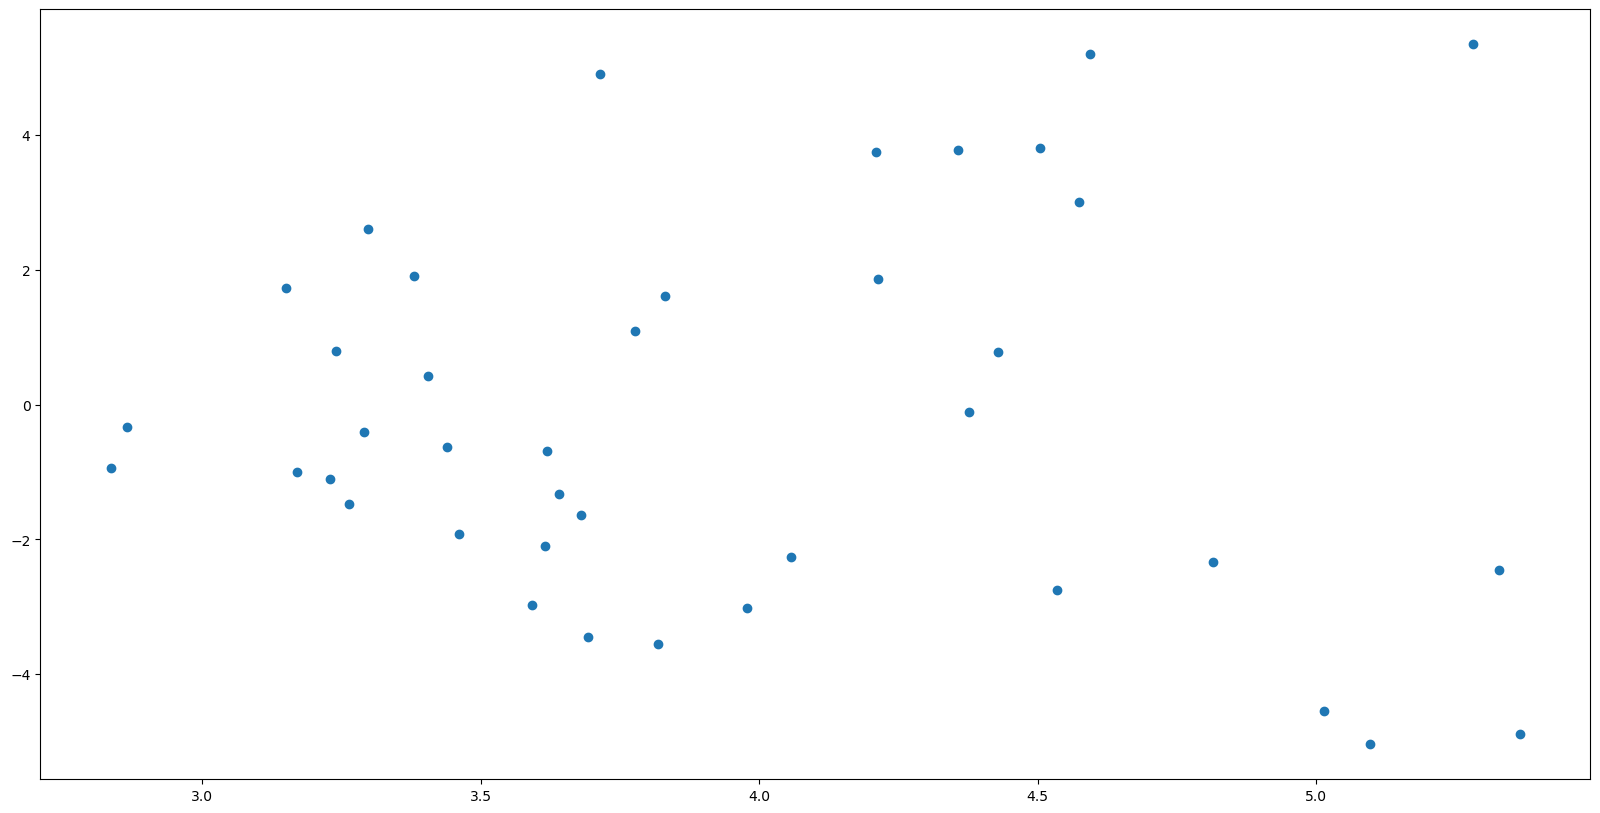

In [70]:
# Plot the result
pyplot.figure(figsize=(20, 10))
pyplot.scatter(result[40:80, 0], result[40:80, 1])

for i, word in enumerate(words[40:80]):
    pyplot.annotate(word, xy=(result[40 + i, 0], result[40 + i, 1]))

pyplot.show()

In [71]:
sentence = str(data['Text'][1])

In [72]:
sentence

' worldcom boss left book alon former worldcom boss berni ebber accus overse 11bn 5 8bn fraud never made account decis wit told juror david myer made comment question defenc lawyer argu mr ebber respons worldcom problem phone compani collaps 2002 prosecutor claim loss hidden protect firm share mr myer alreadi plead guilti fraud assist prosecutor monday defenc lawyer reid weingarten tri distanc client alleg cross examin ask mr myer ever knew mr ebber make account decis awar mr myer repli ever know mr ebber make account entri worldcom book mr weingarten press repli wit mr myer admit order fals account entri request former worldcom chief financi offic scott sullivan defenc lawyer tri paint mr sullivan admit fraud testifi later trial mastermind behind worldcom account hous card mr ebber team meanwhil look portray affabl boss admiss pe graduat economist whatev abil mr ebber transform worldcom rel unknown 160bn telecom giant investor darl late 1990 worldcom problem mount howev competit incre

In [73]:
sentence_nlp = sentence

In [74]:
sentence_nlp

' worldcom boss left book alon former worldcom boss berni ebber accus overse 11bn 5 8bn fraud never made account decis wit told juror david myer made comment question defenc lawyer argu mr ebber respons worldcom problem phone compani collaps 2002 prosecutor claim loss hidden protect firm share mr myer alreadi plead guilti fraud assist prosecutor monday defenc lawyer reid weingarten tri distanc client alleg cross examin ask mr myer ever knew mr ebber make account decis awar mr myer repli ever know mr ebber make account entri worldcom book mr weingarten press repli wit mr myer admit order fals account entri request former worldcom chief financi offic scott sullivan defenc lawyer tri paint mr sullivan admit fraud testifi later trial mastermind behind worldcom account hous card mr ebber team meanwhil look portray affabl boss admiss pe graduat economist whatev abil mr ebber transform worldcom rel unknown 160bn telecom giant investor darl late 1990 worldcom problem mount howev competit incre

In [75]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/vidyadharbendre/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.


True

In [76]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vidyadharbendre/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# 4.Emotion and Sentiment Analysis

In [77]:
pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 692.6 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53427 sha256=79a54d0111202726c89b530bb1bda523501c96a944b4caddd619ea22fcbe8577
  Stored in directory: /Users/vidyadharbendre/Library/Caches/pip/wheels/79/91/ee/8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn
Note: you may need to restart the kernel to use updated packages.


In [78]:
from afinn import Afinn

In [79]:
af = Afinn()

In [80]:
sentiment_scores = [af.score(article) for article in data['Text']]

In [81]:
sentiment_category = ['positive' if score > 3 
                          else 'negative' if score < 3 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [82]:
df = pd.DataFrame([list(data['category']), sentiment_scores, sentiment_category]).T

In [83]:
df.columns = ['category', 'sentiment_score', 'sentiment_category']

In [84]:
df['sentiment_score'] = df.sentiment_score.astype('float')

In [85]:
df.groupby(by=['category']).describe()

sentiment_score                                                 \
                        count       mean        std    min   25%   50%   75%   
category                                                                       
business                510.0   3.425490  13.342008  -51.0  -4.0   4.0  11.0   
entertainment           386.0  18.810881  36.724287  -32.0   1.0  12.0  26.0   
politics                417.0  -2.182254  20.161973 -205.0 -10.0   0.0   7.0   
sport                   511.0  12.816047  17.423148  -27.0   2.0  11.0  21.5   
tech                    401.0   8.022444  19.778953  -87.0  -1.0   9.0  19.0   

                      
                 max  
category              
business        83.0  
entertainment  511.0  
politics       122.0  
sport           95.0  
tech            72.0

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

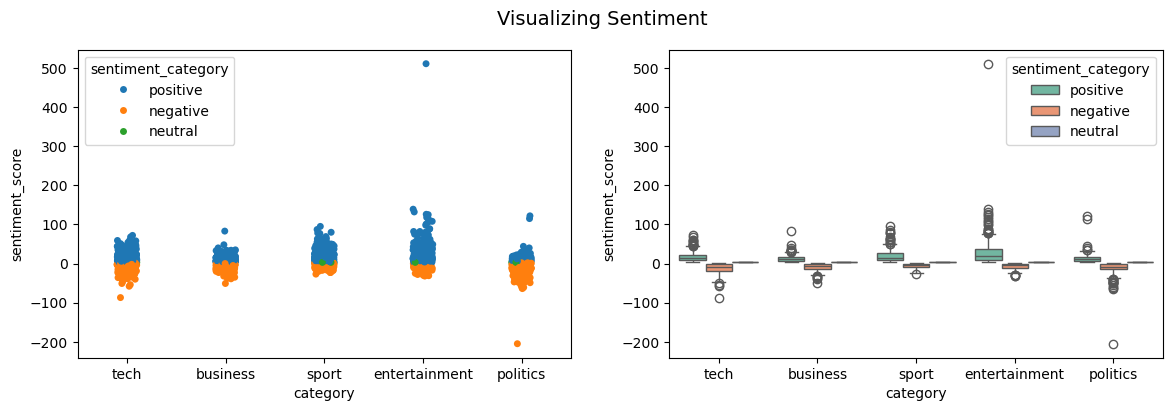

In [88]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='category', y="sentiment_score",  hue='sentiment_category', data=df, ax=ax1)
bp = sns.boxplot(x='category', y="sentiment_score", hue='sentiment_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Sentiment', fontsize=14)

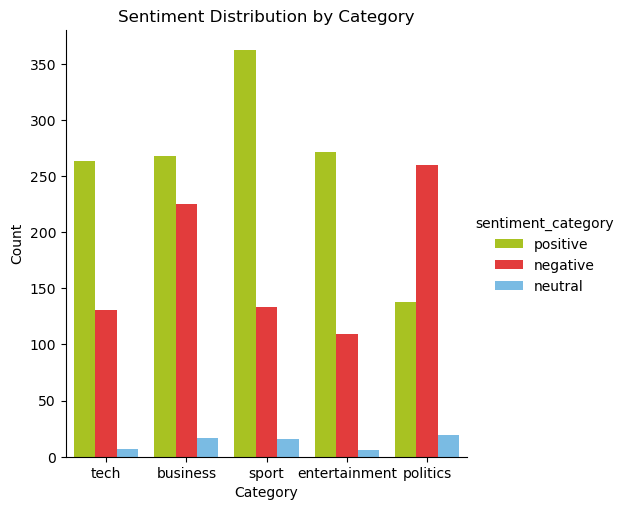

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataframe 'df' with columns 'category' and 'sentiment_category'

# Ensure your data 'df' is properly defined

# Using catplot instead of factorplot
fc = sns.catplot(x="category", hue="sentiment_category", 
                 data=df, kind="count", 
                 palette={"negative": "#FE2020", 
                          "positive": "#BADD07", 
                          "neutral": "#68BFF5"})

# Adjusting the labels and title if needed
fc.set(xlabel='Category', ylabel='Count', title='Sentiment Distribution by Category')

# Show the plot
plt.show()


In [91]:
pos_idx = df[(df.category=='tech') & (df.sentiment_score == df[(df.category=='tech')].sentiment_score.max())].index[0]

In [92]:
neg_idx = df[(df.category=='tech') & (df.sentiment_score == df[(df.category=='tech')].sentiment_score.min())].index[0]

In [93]:
neg_idx

1189

In [94]:
print('Most Negative Tech Article:', data['Text'][neg_idx])

print()
print('Most Positive Tech Article:', data['Text'][pos_idx])

Most Negative Tech Article:  call action internet scam phone compani enough warn custom internet rogu diall scam accord premium phone line regul icsti receiv 45 000 complaint recent month dial internet connect divert premium rate number without user knowledg phone compani refus pay compens say call must paid must warn peopl earlier possibl fraud icsti said peopl use dial connect affect scam without realis program download divert internet call via premium phone line victim often fail notic receiv unusu high bill icsti spokesman rob dwight said phone compani get touch custom sooner bill goe usual 50 month want know straight away want told hit 750 phone compani system place spot fraudul activ artifici inflat traffic said alert number investig look number ad telecom ombudsman elizabeth franc said certainli would surpris find credit card compani phone someth ordinari would expect phone compani look see similar approach biggest phone compani bt say monitor fraud warn peopl rogu diall advic c

In [95]:
df1 = df[df.category=='politics']
pd.unique(df1.sentiment_score)

array([  -2.,    4.,    1.,    6.,  -64.,    9.,   -4.,   19.,  -13.,
          3.,    0.,   13.,  -16.,   -7.,   -1.,   14.,    2.,  -21.,
         15.,   17.,  -11.,   32.,  -49.,   10.,   -3.,  -12.,    7.,
         -9.,  -10.,   20.,  -19.,   18.,   40.,   26.,  -18.,  -29.,
         -5.,   -6.,    5.,   29.,  -25., -205.,   11.,  -20.,   -8.,
         16.,  -51.,  -17.,  -14.,   23.,   22.,  -31.,   24.,   34.,
        115.,  -40.,  -47.,  -56.,   12.,  -39.,  -35.,    8.,   21.,
        -23.,  -43.,  -22.,   25.,  -62.,   44.,  122.,  -41.,  -61.,
        -15.,  -48.,  -32.,  -36.])

In [100]:
# Find the index for the most positive and most negative articles in the 'politics' category
pos_articles = df[(df.category=='politics') & (df.sentiment_score == 5)]
neg_articles = df[(df.category=='politics') & (df.sentiment_score == 30.)]

if not pos_articles.empty:
    pos_idx = pos_articles.index[0]
    if 'Text' in df.columns:  # Check if 'Text' column exists in the DataFrame
        print('Most Positive political Article:', df.loc[pos_idx, 'Text'])
    else:
        print('Column "Text" does not exist in the DataFrame.')
else:
    print('No articles found for most positive in politics category.')

if not neg_articles.empty:
    neg_idx = neg_articles.index[0]
    if 'Text' in df.columns:  # Check if 'Text' column exists in the DataFrame
        print('Most Negative political Article:', df.loc[neg_idx, 'Text'])
    else:
        print('Column "Text" does not exist in the DataFrame.')
else:
    print('No article')


Column "Text" does not exist in the DataFrame.
No article


In [104]:
from textblob import TextBlob

In [105]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in data['Text']]

In [106]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [107]:
df = pd.DataFrame([list(data['category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['category']).describe()

sentiment_score                                              \
                        count      mean       std    min      25%     50%   
category                                                                    
business                510.0  0.036624  0.092738 -0.293 -0.01775  0.0300   
entertainment           386.0  0.154573  0.144290 -0.220  0.06000  0.1345   
politics                417.0  0.098746  0.123197 -0.177  0.01400  0.0840   
sport                   511.0  0.099029  0.115318 -0.460  0.03600  0.1000   
tech                    401.0  0.030312  0.096155 -0.281 -0.03200  0.0360   

                               
                   75%    max  
category                       
business       0.09300  0.372  
entertainment  0.22125  0.689  
politics       0.17300  0.567  
sport          0.16750  0.492  
tech           0.08600  0.358

In [108]:
df.head()

,category,sentiment_score,sentiment_category
0,tech,0.083,positive
1,business,-0.092,negative
2,sport,0.054,positive
3,sport,-0.067,negative
4,entertainment,0.129,positive


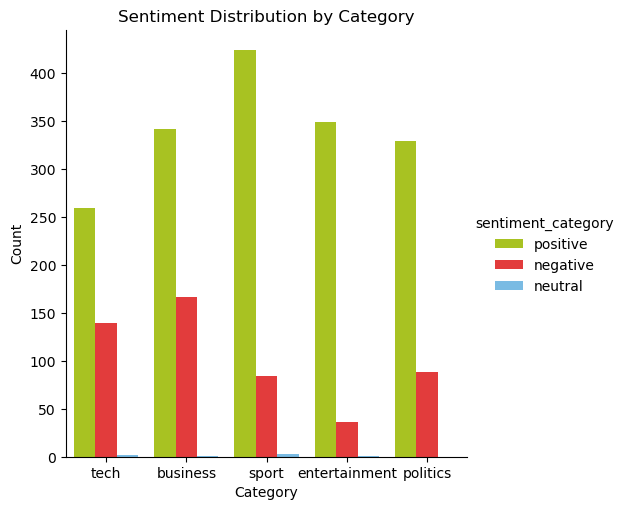

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataframe 'df' with columns 'category' and 'sentiment_category'

# Ensure your data 'df' is properly defined

# Using catplot instead of factorplot
fc = sns.catplot(x="category", hue="sentiment_category", 
                 data=df, kind="count", 
                 palette={"negative": "#FE2020", 
                          "positive": "#BADD07", 
                          "neutral": "#68BFF5"})

# Adjusting the labels and title if needed
fc.set(xlabel='Category', ylabel='Count', title='Sentiment Distribution by Category')

# Show the plot
plt.show()


In [112]:
from sklearn.metrics import confusion_matrix
true_labels=sentiment_category
predicted_labels=sentiment_category_tb
confusion_matrix(true_labels, predicted_labels)

array([[ 345,    2,  511],
       [  15,    1,   49],
       [ 154,    4, 1144]])

<Axes: >

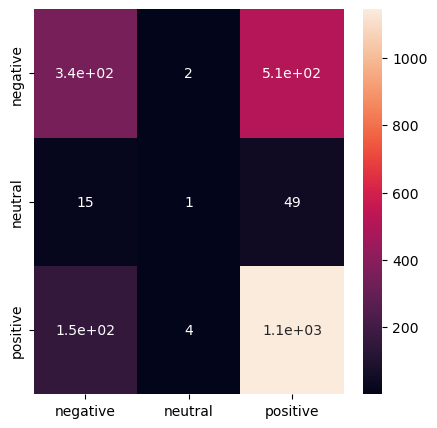

In [113]:
plt.figure(figsize = (5,5))
conf = pd.DataFrame(confusion_matrix(true_labels, predicted_labels),
            index = ['negative', 'neutral', 'positive'],
                  columns = ['negative', 'neutral', 'positive'])
sns.heatmap(conf, annot=True)